In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
resumeDataSet = pd.read_csv('ResumeDataset.csv' ,encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''
print(resumeDataSet.head())

       Category                                             Resume  \
0  Data Science  Skills * Programming Languages: Python (pandas...   
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...   
2  Data Science  Areas of Interest Deep Learning, Control Syste...   
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...   

  cleaned_resume  
0                 
1                 
2                 
3                 
4                 


In [3]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))
print(resumeDataSet['cleaned_resume'])

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: cleaned_resume, Length: 962, dtype: object


In [4]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.corpus import stopwords
import string
# from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

resumeDataSet['encodedCategory'] = le.fit_transform(resumeDataSet['Category'])

In [5]:
resumeDataSet['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

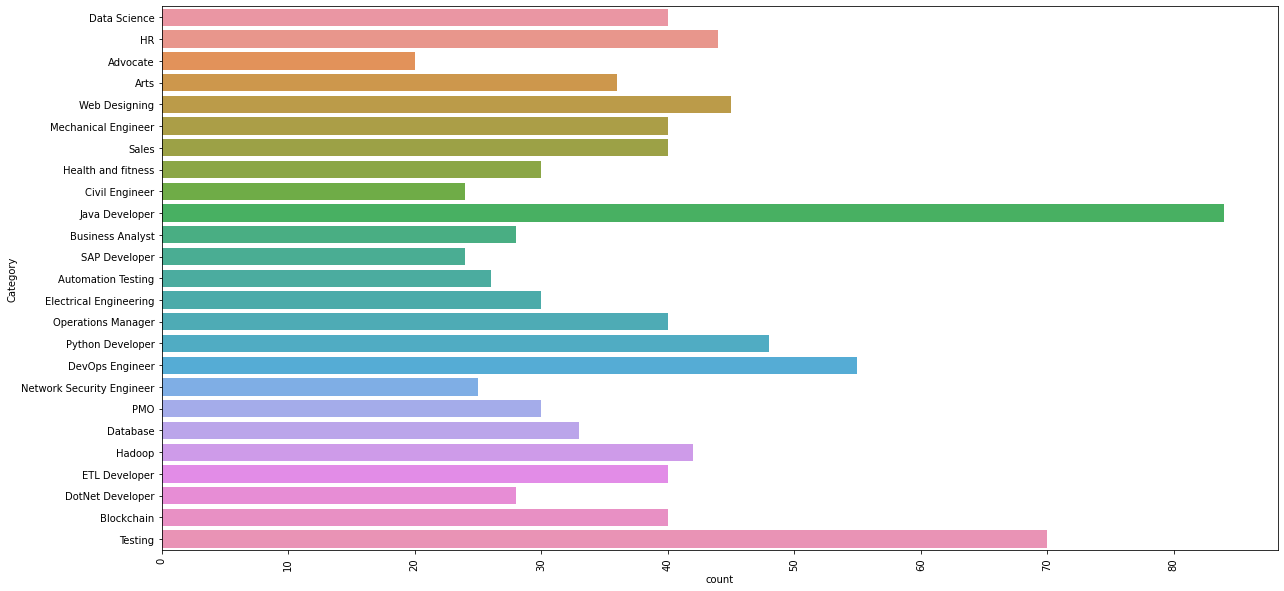

In [6]:
import seaborn as sns
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resumeDataSet)
plt.show()

In [7]:
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from scipy.sparse import hstack

# requiredText = resumeDataSet['cleaned_resume'].values
# requiredTarget = resumeDataSet['encodedCategory'].values

# word_vectorizer = TfidfVectorizer(
#     sublinear_tf=True,
#     stop_words='english',
#     max_features=1500)
# word_vectorizer.fit(requiredText)
# WordFeatures = word_vectorizer.transform(requiredText)

# print ("Feature completed .....")

# X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
# print(X_train.shape)
# print(X_test.shape)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['encodedCategory'].values

tv = TfidfVectorizer(use_idf=True, ngram_range=(1,2),sublinear_tf=False, stop_words='english')
tv.fit(requiredText)
WordFeatures_tv = tv.transform(requiredText)

cv = CountVectorizer(binary=False, ngram_range=(1,2), stop_words='english')
cv.fit(requiredText)
WordFeatures_cv = cv.transform(requiredText)
print ("Feature completed .....")

# X_train,X_test,y_train,y_ test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)

X_train_tv,X_test_tv,y_train_tv,y_test_tv = train_test_split(WordFeatures_tv,requiredTarget,random_state=0, test_size=0.3)
X_train_cv,X_test_cv,y_train_cv,y_test_cv = train_test_split(WordFeatures_cv,requiredTarget,random_state=0, test_size=0.3)
print("For Tfidf..")
print(X_train_tv.shape)
print(X_test_tv.shape)

print("For CountVectorizer..")
print(X_train_cv.shape)
print(X_test_cv.shape)

Feature completed .....
For Tfidf..
(673, 41068)
(289, 41068)
For CountVectorizer..
(673, 41068)
(289, 41068)


In [8]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [9]:
# clf = OneVsRestClassifier(KNeighborsClassifier())
# clf.fit(X_train, y_train)
# prediction = clf.predict(X_test)
# print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
# print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

# print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

# print("\n Prediction \n")

knn_tv = OneVsRestClassifier(KNeighborsClassifier())
knn_tv.fit(X_train_tv, y_train_tv)
prediction = knn_tv.predict(X_test_tv)
print("Using TFIDF...")
print('Accuracy of KNeighbors Classifier on training set: {:2.2%}'.format(knn_tv.score(X_train_tv, y_train_tv)))
print('Accuracy of KNeighbors Classifier on test set: {:2.2%}'.format(knn_tv.score(X_test_tv, y_test_tv)))

knn_cv = OneVsRestClassifier(KNeighborsClassifier())
knn_cv.fit(X_train_cv, y_train_cv)
prediction = knn_cv.predict(X_test_cv)
print("Using Count Vectorizer...")
print('Accuracy of KNeighbors Classifier on training set: {:2.2%}'.format(knn_cv.score(X_train_cv, y_train_cv)))
print('Accuracy of KNeighbors Classifier on test set: {:2.2%}'.format(knn_cv.score(X_test_cv, y_test_cv)))


# print(prediction)

Using TFIDF...
Accuracy of KNeighbors Classifier on training set: 98.51%
Accuracy of KNeighbors Classifier on test set: 96.89%
Using Count Vectorizer...
Accuracy of KNeighbors Classifier on training set: 95.10%
Accuracy of KNeighbors Classifier on test set: 88.58%


In [10]:
from sklearn.linear_model import LogisticRegression
lr_tv = OneVsRestClassifier(LogisticRegression())
lr_tv.fit(X_train_tv, y_train_tv)
prediction = lr_tv.predict(X_test_tv)
print("Using TFIDF...")
print('Accuracy of Logistic Regression Classifier on training set: {:2.2%}'.format(lr_tv.score(X_train_tv, y_train_tv)))
print('Accuracy of Logistic Regression on test set: {:2.2%}'.format(lr_tv.score(X_test_tv, y_test_tv)))

lr_cv = OneVsRestClassifier(LogisticRegression())
lr_cv.fit(X_train_cv, y_train_cv)
prediction = lr_cv.predict(X_test_cv)
print("Using Count Vectorizer...")
print('Accuracy of Logistic Regression Classifier on training set: {:2.2%}'.format(lr_cv.score(X_train_cv, y_train_cv)))
print('Accuracy of Logistic Regression on test set: {:2.2%}'.format(lr_cv.score(X_test_cv, y_test_cv)))

Using TFIDF...
Accuracy of Logistic Regression Classifier on training set: 100.00%
Accuracy of Logistic Regression on test set: 99.31%
Using Count Vectorizer...
Accuracy of Logistic Regression Classifier on training set: 100.00%
Accuracy of Logistic Regression on test set: 99.31%


In [12]:
import pickle

In [13]:
data = {"model": knn_tv, "le": le, "word_vectorizer": tv}

with open('predictor.pkl', 'wb') as file:
    pickle.dump(data, file)

In [14]:
with open('predictor.pkl', 'rb') as file:
    data = pickle.load(file)
    
model = data["model"]
saved_le = data["le"]
saved_wv = data["word_vectorizer"]

In [15]:
def predictCategory(inputText):
    inputText = cleanResume(inputText)
    vectorized_text = saved_wv.transform([inputText])
    pred = model.predict(vectorized_text)
    return saved_le.inverse_transform([pred])[0]

In [16]:
predictCategory(resumeDataSet['Resume'][0])

'Data Science'